In [ ]:
%%bash

# get the data

mkdir data
if [ ! -f data/adult.data ]; then
    wget -q -O data/adult.data https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
fi

In [1]:
%matplotlib inline
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data = pd.read_csv("data/adult.data", sep=",", header=None)
data.columns = ["age", "type_employer", "fnlwgt", "education", 
                "education_num","marital", "occupation", "relationship", "race","sex",
                "capital_gain", "capital_loss", "hr_per_week","country", "income"]
data.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


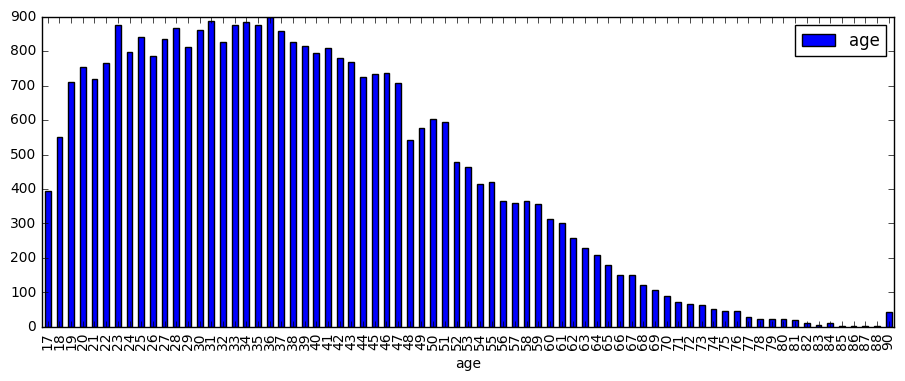

In [3]:
data.groupby("age").agg({"age": len}).plot(kind="bar", figsize=(11, 4))

        income
income        
 <=50K   24720
 >50K     7841


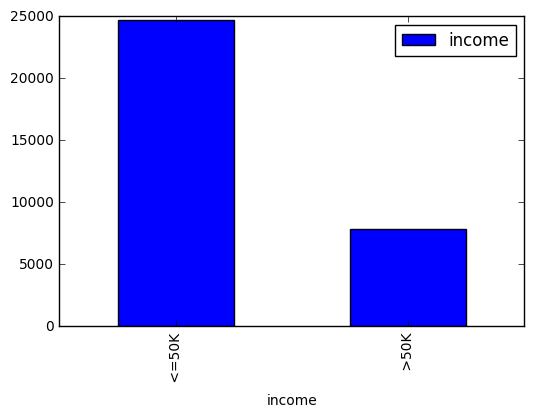

In [4]:
# get natural rate
print data.groupby("income").agg({"income": len})
data.groupby("income").agg({"income": len}).plot(kind="bar")

In [5]:
# data transformations

def categorize_age(age):
    if age >= 75:
        return "75+"
    elif age >= 65:
        return "65-74"
    elif age >= 55:
        return "55-64"
    elif age >= 45:
        return "45-54"
    elif age >= 35:
        return "35-44"
    elif age >= 25:
        return "25-34"
    elif age >= 18:
        return "18-24"
    else:
        return "<18"

data["income"] = data["income"].apply(lambda x: 1 if x.strip() == ">50K" else 0)
data["age"] = data["age"].apply(lambda x: categorize_age(x))
data = data.drop(["fnlwgt", "education_num"], axis=1)
data = pd.get_dummies(data=data, 
                      columns=[
        "age", "type_employer", "education", "marital",
        "occupation", "relationship", "race", "sex", "country"
    ])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("income", axis=1), data["income"], test_size=0.33
)

In [10]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X=X_train, y=y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
preds = rf.predict(X=X_test)

In [12]:
rf.score(X=X_test, y=y_test)

0.84431416340964083

In [13]:
scores = cross_val_score(rf, X_test, y_test)
scores.mean()

0.83882389574713867

In [ ]:
from collections import Counter; Counter(data["income"])

In [28]:
1 - 7841.0/(24720.0 + 7841.0)


0.7591904425539756

In [25]:
from pprint import pprint

fi = pd.DataFrame(zip(data.columns, list(rf.feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values("Importance", ascending=False).head(15)

,Feature,Importance
2,hr_per_week,0.150426
0,capital_gain,0.123611
38,marital_ Married-AF-spouse,0.089657
58,occupation_ Transport-moving,0.046348
1,capital_loss,0.041787
40,marital_ Married-spouse-absent,0.026362
29,education_ Assoc-voc,0.024495
47,occupation_ Craft-repair,0.024105
53,occupation_ Priv-house-serv,0.021341
6,age_35-44,0.019775
